<a href="https://colab.research.google.com/github/Jhonsilvaa/previsao-da-idade-de-abalones-com-machine-learning/blob/main/Previs%C3%A3o_da_Idade_de_Abalones_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão da Idade de Abalones com Machine Learning
---
O Abalone é um molusco gastrópode descrito por Linnaeus em 1758. Pertence à família Haliotidae e é encontrado em diversas espécies nas águas costeiras de quase todo o mundo. Os abalones possuem características anatômicas primitivas, como simetria bilateral. Eles têm um coração e um gânglio cerebral que fornece nervos aos órgãos sensoriais, mas não têm cérebro ou mecanismos de coagulação do sangue. Seus pés musculosos e ventosos ocupam a maior parte de seus corpos, ajudando-os a se agarrar a superfícies rochosas.

As espécies mais jovens geram milhares de ovos nos anos iniciais de reprodução, mas quando ficam mais velhos e maiores, eles geram milhões. Apesar desse alto número de ovos, as conchas menores sofrem uma taxa de mortalidade de 60% a 99%.

<p align=center>
<img src="https://github.com/user-attachments/assets/97159466-0a19-4384-b69e-0773e7ef2637" width="65%"></p>

A idade do abalone está diretamente ligada ao seu ciclo de vida e reprodutivo. Saber a idade ajuda na gestão sustentável das populações de abalone, evitando a captura de espécimes jovens que ainda não se reproduziram, garantindo assim a sustentabilidade da espécie. No entanto, a idade dos abalones não pode ser facilmente determinada apenas observando sua aparência externa. Tradicionalmente, a idade é estimada contando os anéis de crescimento em sua concha, um processo demorado e destrutivo.


O objetivo deste projeto é criar um modelo de machine learning capaz de prever a idade dos abalones com base em suas características físicas, como o comprimento, a altura, o diâmetro, o peso do músculo e etc...




## Descrição de Variáveis
Um guia que fornece descrições conceituais de cada variável em nosso conjunto de dados.




* `Sex`: Representa o sexo do abalone. Os valores são representados por  M (masculino), F (feminino) e I (infantil).

* `Length`: A medida mais longa da concha de abalone em milímetro.

* `Diameter`: medida da concha de abalone perpendicular ao comprimento em milímetro.

* `Height`: Altura da concha em milímetro.

* `Whole_weight`: Peso do abalone em gramas.

* `Shucked_weight`: Peso somente da carne no abalone em gramas.

* `Viscera_weight`: Peso do abalone após sangramento em gramas.

* `Shell_weight`: Peso da concha do abalone após ser seca em gramas.

* `Rings`: Número de anéis na concha do abalone, onde cada anel adicional corresponde a aproximadamente 1,5 anos de idade



## Importando os Dados

 A importação de dados é o processo de carregamento e leitura de dados em um notebook. Os aspectos que devem ser consideradas na importação de dados são formatos de dados e locais de armazenamento de arquivos de conjuntos de dados. Existem vários formatos de dados que podem ser importados para notebooks, como .csv, .xlsx, .json e assim por diante. Para locais de armazenamento, existem duas opções, nomeadamente a partir de um computador local ou da internet, por meio de um link. Uma importação adequada garante que os dados sejam lidos corretamente e estejam prontos para as etapas seguintes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from rich import print as rprint
from rich.console import Console
from rich.table import Table
from rich.panel import Panel

Neste projeto, os dados utilizados foram obtidos do repositório de Machine learning da UCI (University of California, Irvine). Especificamente, a base de dados do Abalone pode ser acessada através do link: [UCI Abalone Dataset](https://archive.ics.uci.edu/dataset/1/abalone)


<p align=center>
<img src="https://github.com/user-attachments/assets/f0635601-c1e6-4d11-b0e0-079e97f838ff" width="38%"></p>

 Os dados abrangem um total de 4.177 instâncias. Cada instância representa um abalone individual e inclui as características mencionadas na descrição de variaveis.

In [ ]:
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
df_abalones = pd.read_csv('/content/abalone.csv')
df_abalones.index = np.arange(1, len(df_abalones)+1)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise exploratória de dados
Com os dados devidamente coletados, a próxima etapa é a análise exploratória de dados. Nessa etapa, empregamos diversas técnicas e ferramentas para entender melhor os dados coletados, identificando possíveis anomalias, relacionamentos e tendências nos dados.

* Antes de iniciar a análise dos dados, vamos verificar o nosso dataset, analisando as 5 primeiras entradas.

In [ ]:
df_abalones.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### **1. Qual é a natureza do conjunto de dados?**

Durante a etapa de análise exploratória de dados, o primeiro passo é a compreensão do seu conjunto de dados, isto é, seu tamanho, a porcentagem de valores ausentes e os tipos de variáveis. O tamanho do conjunto serve para avaliar sua amplitude e, por consequência, sua complexidade. A porcentagem de dados ausentes serve como um parâmetro para medir a quantidade de informações faltantes em comparação ao total do conjunto de dados. Por sua vez, os tipos de variáveis revelam a natureza dos dados.

In [ ]:
table = Table(title='Informações das Variáveis')
table.add_column('Variable_name', justify='center')
table.add_column('Data_type', justify='center')
table.add_column('Unique_value', justify='center')
table.add_column('% of NaN', justify='center')
for column in df_abalones.columns:
  table.add_row(f'{column}', f'{df_abalones[column].dtypes}',
                f'{len(df_abalones[column].unique())}',
                f'{np.divide(df_abalones[column].isnull().sum(),len(df_abalones))*100}')

print("Entradas:\t {}".format(df_abalones.shape[0]))
print("Variáveis:\t {}\n".format(df_abalones.shape[1]))
rprint(table)

Entradas:	 4177
Variáveis:	 9



               Informações das Variáveis                
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Variable_name  ┃ Data_type ┃ Unique_value ┃ % of NaN ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│      Sex       │  object   │      3       │   0.0    │
│     Length     │  float64  │     134      │   0.0    │
│    Diameter    │  float64  │     111      │   0.0    │
│     Height     │  float64  │      51      │   0.0    │
│  Whole_weight  │  float64  │     2429     │   0.0    │
│ Shucked_weight │  float64  │     1515     │   0.0    │
│ Viscera_weight │  float64  │     880      │   0.0    │
│  Shell_weight  │  float64  │     926      │   0.0    │
│     Rings      │   int64   │      28      │   0.0    │
└────────────────┴───────────┴──────────────┴──────────┘

* Podemos observar a distribuição dos tipos de dados e exibir os resultados em porcentagem.

float64    77.78
object     11.11
int64      11.11



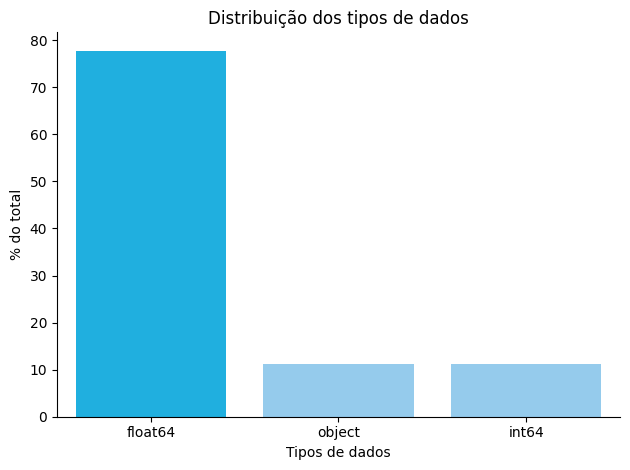

In [ ]:
fig, ax = plt.subplots()
data = (df_abalones.dtypes.value_counts(normalize=True)*100).round(2)
sns.barplot(x=data.index.astype(str), y=data.values, palette=['deepskyblue', "lightskyblue",  "lightskyblue"])
plt.title('Distribuição dos tipos de dados')
plt.xlabel('Tipos de dados')
plt.ylabel('% do total')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

Com base nas informações fornecidas, podemos observar que:

* É possível identificar que a variável `Rings` é o nosso atributo alvo.

* Não há valores ausentes no conjunto de dados.

* A maioria dos dados no dataset é do tipo `Float64` (77,78%), seguido por `Int64` (11,11%) e `Object` (11,11%). As variáveis categóricas, especificamente a variável `Sex`, precisam ser codificadas em valores numéricos.

### **2. Qual o tipo de distribuição das variáveis?**



Em um conjunto de dados é importante descrever o comportamento de como os valores estão distribuídos,
<br>usaremos o histograma para identificar a distribuição das variáveis numéricas.

In [ ]:
def custom_histplot(data, columns, colors, grid_shape=(2, 3), figsize=(14, 5), dpi=72):
    n_rows, n_cols = grid_shape
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize, dpi=dpi)
    axes = ax.flatten()

    for axis, column, color in zip(axes, columns, colors):
        sns.histplot(data=data, x=column, color=color, ax=axis, kde=True, bins='sturges')
        axis.spines['right'].set_visible(False)
        axis.spines['top'].set_visible(False)

    for remaining_ax in axes[len(columns):]:
        remaining_ax.set_visible(False)

    return plt.tight_layout()

A seguir, utilizamos a biblioteca Seaborn para gerar histogramas que permitem visualizar a distribuição das variáveis numéricas no dataset.

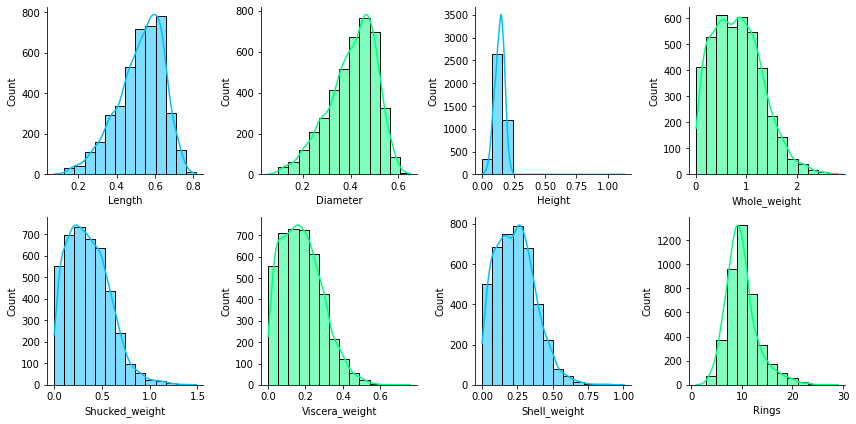

In [ ]:
num_columns = df_abalones.select_dtypes(include='number').columns
custom_histplot(data=df_abalones, columns=num_columns,
                colors=['deepskyblue', 'springgreen']*4, grid_shape=(2, 4), figsize=(12, 6))

Com base nas informações fornecidas pelo histograma, podemos observar que:


* As características `Length` e  `Diameter` sinalizam uma assimétria à esquerda, tanto o comprimento e o diametro dos abalones tem valores moderamente altos e apenas poucos espécimes muito pequenos, supostamente pode ser caracteristicas de abalones jovens ou imaturos.

* Tanto a variavel `Height` e as variáveis de peso (`Whole_weight`, `Shucked_weight`, `Viscera_weight` e `Shell_weight`) tem uma assimetria a direita, podemos concluir que a altura e os pesos dos abalones esta concentrada faixas menores ou próximas da média, mas ainda tendo alguns individuos acima.

* Por fim, a variável `Rings`, mostra que grande parte dos abalones tem uma idade média, com um pico em torno de 10 anéis.

### **3. Qual é a distribuição dos abalones por sexo?**

O atributo `Sex` representa uma variável categórica que classifica os abalones em três categorias: `M` para masculino, `F` para feminino e `I` para infantil (abalones que ainda não atingiram a fase adulta). Para compreender a distribuição desses grupos, analisaremos a contagem de cada categoria.


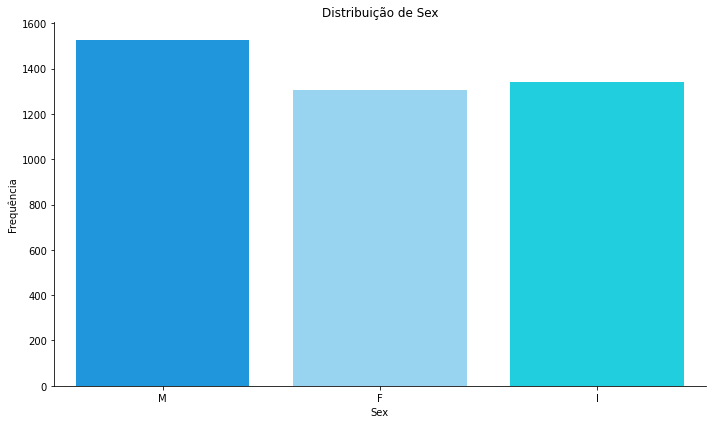

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.countplot(data=df_abalones, x='Sex', palette=['#009FFD','#89DAFF', '#00E8FC'],
              linewidth=0, edgecolor="none", ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Distribuição de Sex')
ax.set_ylabel('Frequência')
plt.tight_layout()

Analisando o grafico acima, podemos concluir que a distribuição de `sex` é relativamente equilibrada, mas há um pouco mais de abalones masculinos(0.36) e infantil(0.32) em comparação com feminino(0.31).

### **4. Há *outliers* presentes?**


Outliers, ou valores discrepantes, são observações que se distanciam significativamente do padrão geral dos dados. Eles podem resultar de erros de medição, variabilidade natural ou outras causas desconhecidas. Identificar e lidar com esses valores é essencial, pois podem influenciar negativamente a performance dos modelos preditivos e a precisão das análises estatísticas.

**<h4> Método do Intervalo Interquartil (IQR)</h4>**

O intervalo interquartil (IQR) mede a dispersão dos 50% centrais dos dados, calculado como a diferença entre o terceiro (Q3) e o primeiro quartil (Q1):

$$\text{IQR} = Q3 - Q1$$

Outliers são identificados pelos limites inferior e superior:

$$\text{Limite Inferior} = Q1 - 1.5 \times \text{IQR}$$
$$\text{Limite Superior} = Q3 + 1.5 \times \text{IQR}$$

Valores fora desse intervalo são outliers:
* Inferior: menor que o Limite Inferior.
* Superior: maior que o Limite Superior.







A seguir, criarei uma função chamada `detect_outliers_iqr` que utiliza o método do intervalo interquartil (IQR). Esta função será aplicada às variáveis numéricas do dataset.


In [ ]:
def detect_outliers_iqr(data):
    Q1 = np.nanpercentile(data, 25)
    Q3 = np.nanpercentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = ((data < lower_bound) | (data > upper_bound))
    return n_outliers

aqui, irei aplicar a função `detect_outliers_iqr` e, em seguida, imprimir a quantidade de outliers encontrados em cada coluna

In [ ]:
for column in num_columns:
    result = detect_outliers_iqr(df_abalones[column].values)
    print(f'{column}: qtd de outliers - {result.sum()}')

Length: qtd de outliers - 49
Diameter: qtd de outliers - 59
Height: qtd de outliers - 29
Whole_weight: qtd de outliers - 30
Shucked_weight: qtd de outliers - 48
Viscera_weight: qtd de outliers - 26
Shell_weight: qtd de outliers - 35
Rings: qtd de outliers - 278


Podemos constatar que todas das variaveis numericas  no dataset possuem outliers detectáveis pelo método do IQR.

A análise do boxplot para as colunas numericas reforça essa hipótese. O boxplot utiliza os quartis e a amplitude interquartil (IQR) para determinar os limites além dos quais os dados são considerados outliers.

In [ ]:
def custom_boxplot(data, columns, colors, grid_shape=(2, 3), figsize=(14, 8), dpi=72):
    n_rows, n_cols = grid_shape
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize, dpi=dpi)
    axes = ax.flatten()

    for axis, column, color in zip(axes, columns, colors):
        sns.boxplot(data=data, x=column, color=color, ax=axis)
        axis.spines['right'].set_visible(False)
        axis.spines['top'].set_visible(False)

    for remaining_ax in axes[len(columns):]:
        remaining_ax.set_visible(False)

    return plt.tight_layout()

A seguir, utilizamos a biblioteca Seaborn para gerar boxplots que permitem visualizar presença de outliers das variáveis numéricas no dataset.

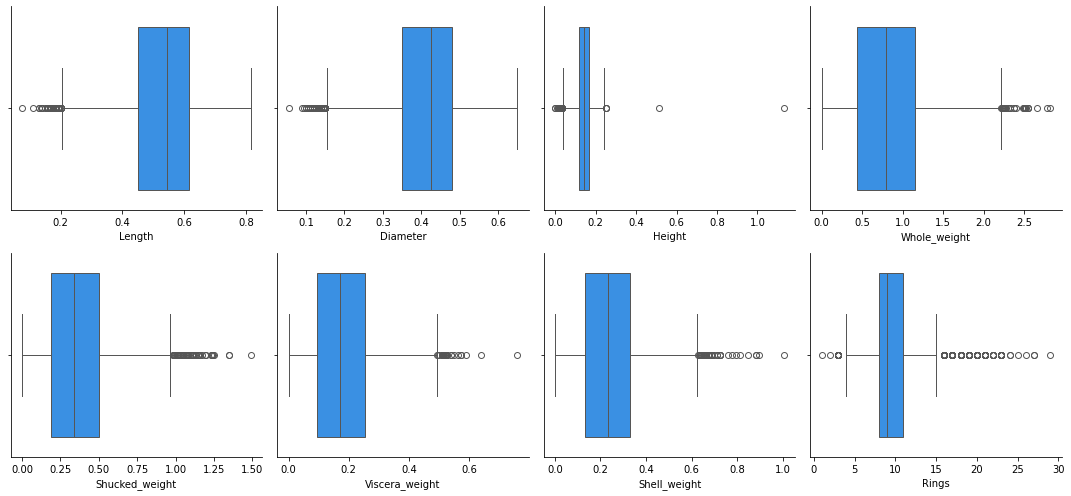

In [ ]:
custom_boxplot(data=df_abalones, colors=['dodgerblue']*8,
               columns=num_columns,
               grid_shape=(2, 4),figsize=(15, 7))

Na etapa de pré-processamento, iremos aplicar um tratamento adequado aos  outliers e garantir que o modelo de machine learning não seja influenciado por eles.

### **5. Qual é o volume dos abalones?**





Para entender melhor as características físicas dos abalones e como elas podem influenciar a predição de sua idade, iremos calcular o volume desses moluscos. Uma forma eficaz de fazer isso é aproximar os abalones como elipsoides, que são formas tridimensionais alongadas semelhantes a uma esfera achatada.

O volume de um elipsoide pode ser calculado usando a seguinte fórmula:

$$V = \frac{4}{3} \pi a b c \ $$

onde $(a)$, $(b)$ e $( c )$ são os semi-eixos do elipsoide. No contexto do nosso dataset, podemos utilizar as seguintes variáveis:

- $(a)$: metade do comprimento (Length / 2)
- $(b)$: metade do diâmetro (Diameter / 2)
- $(c)$: metade da altura (Height / 2)

Ao aplicar esta fórmula, podemos obter um volume aproximado para cada abalone.

In [ ]:
volume = (4/3) * np.pi * (df_abalones['Length']/2) * (df_abalones['Diameter']/2) * (df_abalones['Height']/2)
df_abalones['Volume'] = volume
df_abalones.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Volume
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.008261
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.004371
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.015735
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.010511
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.003525


### **6. Qual a correlação existente entre as variáveis?**

A correlação é uma medida que descreve a direção e a intensidade da relação entre duas ou mais variáveis. Para determinar as correlações existentes entre as variáveis de interesse, é comum gerar uma matriz de correlação. Essa matriz é composta por coeficientes de correlação que indicam a força e a direção da relação entre cada par de variáveis.

* Para analisar as relações entre as variáveis numéricas do dataset, podemos utilizar a matriz de correlação. No código abaixo, calculamos a matriz de correlação das colunas numéricas e visualizamos esta matriz usando um heatmap.

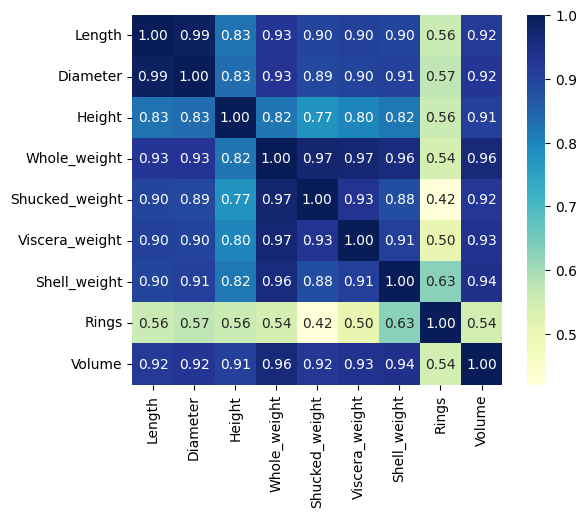

In [ ]:
corr = df_abalones[num_columns].corr()
sns.heatmap(corr, cmap='YlGnBu', fmt='.2f', square=True, linecolor='white', annot=True);

Analisando as correlaçoes geradas pelo heatmap, podemos tirar as seguintes conclusões:

* De modo geral, as medidas físicas (como comprimento, diâmetro, altura e volume) e os pesos (total, carne, vísceras, concha) apresentam uma forte relação entre si. No entanto, essas variáveis mostram uma influência que é moderada sobre o atributo alvo (Rings), com destaque a variavel (shell_weight), que possui a correlação mais significativa (0.63) em relação as outras variaveis. Essa constatação sugere que supostamente, além do crescimento físico, outros fatores podem ter uma influencia mais determinante a idade dos abalones.


##  Pré-processamento de dados

Com base nos resultados da análise exploratória, podemos direcionar nossos esforços para o pré-processamento dos dados. Essa etapa inclui uma série de atividades que têm como objetivo preparar os dados para modelagem, tornando-os mais adequados para uso em modelos e algoritmos. As atividades que realizamos incluem limpeza dos dados, Tratamento de outliers, normalização, codificação de variáveis e inclui a divisão dos dados em conjuntos de treinamento e teste e entre outros.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

### **Tratamento de outliers**
Na Análise Exploratória de Dados, verificamos que todas as variáveis numéricas do dataset apresentavam outliers. Existem diversas abordagens para tratar esses valores discrepantes, cada uma com suas vantagens e limitações. Entre as opções estão remoção, imputação, capping e transformação. Nesta etapa, aplicaremos a opção mais adequada para mitigar o impacto negativo que os outliers podem causar na performance dos modelos preditivos.

* A seguir, irei remover linhas com valores zero em `Height` e `Volume` e tratar outliers nas colunas numéricas substituindo-os pela mediana usando o método IQR.

In [ ]:
zero_index = df_abalones[df_abalones[['Height']].eq(0).any(axis=1)].index.copy()
df_abalones.drop(index=zero_index, inplace=True)

### **Separando entre Treino e Teste**
A separação de dados em treino e teste é um processo importante em machine learning. O objetivo é dividir os dados em dois conjuntos: um para treinar o modelo e outro para testá-lo. Isso é feito para evitar que o modelo seja treinado de forma a se adaptar apenas aos dados de treino, o que pode levar a problemas como overfitting.


In [ ]:
features = df_abalones.drop(columns='Rings').copy()
target = df_abalones.Rings.copy()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.10, random_state=0,shuffle=True)

**Conjunto de Treino**

O conjunto de dados de treinamento é utilizado para treinar o modelo, desenvolver o pipeline de processamento dos dados e criar nossa baseline. Esta baseline será usada como referência para selecionar o modelo que será otimizado.

In [ ]:
print(f'X_train: shape:{X_train.shape}')
print(f'y_train: shape:{y_train.shape}')

X_train: shape:(3757, 9)
y_train: shape:(3757,)


**Conjunto de Teste**

Esse conjunto é utilizado apenas no final, com o seu modelo pronto, e otimizado, para testar o resultado do modelo pronto com dados novos, da mesma forma que ele receberá esses dados no mundo real.

In [ ]:
print(f'X_test: shape:{X_test.shape}')
print(f'y_test: shape:{y_test.shape}')

X_test: shape:(418, 9)
y_test: shape:(418,)


### **Codificação de variáveis categóricas - One-Hot Encoder**

Na análise exploratoria de dados, é comum trabalhar com variáveis ​​categóricas, que representam características qualitativas de um conjunto de dados. No entanto, muitos algoritmos de Machine learning exigem que os dados de entrada sejam numéricos. É necessário converter essas variáveis ​​categóricas em um formato numérico, preservando as informações originais. One-Hot Encoder é uma técnica de pré-processamento que é usada para converter variáveis categóricas em vetores binários. Ele cria um novo recurso para cada categoria única e atribui um valor binário (1 ou 0) para cada recurso, indicando se a amostra tem ou não a categoria correspondente.

Aqui, Utilizei a classe OneHotEncoder da biblioteca category_encoders para realizar a codificação one-hot da variável categórica `Sex` presente no conjunto de dados de treinamento.

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_enc = encoder.fit_transform(X_train[['Sex']].copy())
X_train_enc = pd.DataFrame(X_train_enc.toarray().astype('int'), columns=encoder.get_feature_names_out(['Sex']))
X_train_enc.reset_index(drop=True, inplace=True)

### **Padronização de dados - Robust Scaler**

A padronização de dados consiste na transformação de variáveis numéricas para uma escala comum. O objetivo é normalizar as escalas das variáveis, evitando que qualquer uma delas exerça influência excessiva sobre os modelos.

O Robust Scaler é uma técnica de padronização de dados que é menos sensível a outliers do que o tradicional Standard Scaler. Enquanto o Standard Scaler utiliza a média e o desvio padrão para realizar a padronização, o Robust Scaler usa a mediana e o intervalo interquartil (IQR) para realizar essa tarefa.


In [ ]:
scaler_columns = X_train.select_dtypes(include='number').columns
scaler = RobustScaler()
X_train_scaler = scaler.fit_transform(X_train[scaler_columns].copy())

Em seguida, concatenarei os dados categóricos previamente codificados (X_train_enc) com os dados escalonados (X_train_scaler) em um único DataFrame.

In [ ]:
X_train_transform = pd.DataFrame(X_train_scaler, columns=X_train[scaler_columns].columns)
X_train_transform = pd.concat([X_train_enc, X_train_transform], axis=1).copy()
X_train_transform.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Volume
0,1,0,0,0.303030,0.307692,0.0,0.439576,0.576190,0.463722,0.358779,0.190735
1,1,0,0,0.545455,0.615385,0.6,0.652297,0.558730,0.955836,0.613232,0.705370
2,1,0,0,-1.060606,-1.153846,-1.1,-0.793640,-0.736508,-0.738170,-0.837150,-0.790440
3,0,1,0,-0.575758,-0.538462,-0.5,-0.513781,-0.482540,-0.394322,-0.620865,-0.473364
4,0,1,0,-0.272727,-0.384615,-0.3,-0.328622,-0.244444,-0.293375,-0.394402,-0.308140


Com os dados devidamente transformados e sem a necessidade de ajustes adicionais, é possível iniciar a modelagem de Machine Learning.

##  Modelagem de Machine Learning

Depois do pré-processamento de dados, o próximo passo é a criação do modelo. Isso envolve a escolha dos algoritmos de Machine learning mais adequado para o problema e a definição dos parâmetros dos modelos.

In [ ]:
!pip install scikit-optimize
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### **Modelo Baseline de desempenho dos Modelos**


O modelo baseline é um modelo simples que nos ajuda a entender o mínimo de desempenho que podemos esperar. Ele serve como uma linha de base para medir o desempenho de modelos mais complexos que desenvolveremos posteriormente.

Irei usar a cross-validation para estimar o erro da baseline dos modelos iniciais.  A métrica utilizada para avaliação será `RMSE`.

A seguir,  criei um pré-processador usando ColumnTransformer para aplicar diferentes transformações às colunas. A coluna `Sex` será codificada com `OneHotEncoder`, enquanto as colunas numéricas serão escaladas com `RobustScaler`.

In [ ]:
preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(),['Sex']),
            ('num', RobustScaler(),scaler_columns)])

O modelo `DummyRegressor` esta sendo utilizado como baseline de desempenho para os demais modelos que iremos testar.

In [ ]:
pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DummyRegressor())])

scores = -cross_val_score(pipe, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(f'RMSE: {np.mean(scores)}')
print(f'Deviation: {np.std(scores)}')

RMSE: 3.224306960166371
Deviation: 0.15815684221030699


### **Teste de Performance dos Modelos**

Para avaliar a performance dos modelos de regressão, aplicarei a validação cruzada em diferentes algoritmos de machine learning. O objetivo é identificar o modelo com o menor erro quadrático médio (RMSE). Os modelos selecionados para essa análise são:

* Stochastic Gradient Descent
* XGboost
* LightGBM
* KNN

In [ ]:
knn = KNeighborsRegressor()
xgb = XGBRegressor()
sgd = SGDRegressor()
lgbm = LGBMRegressor()

A seguir, com o objetivo de avaliar o desempenho dos modelos escolhidos, estou utilizando a validação cruzada para cada modelo, armazenando os nomes e as pontuações de RMSE em listas. Em seguida, essas listas são convertidas em um DataFrame do pandas que organiza as pontuações dos modelos em uma tabela para uma análise mais fácil e comparativa.

In [ ]:
models = []
scores = []
for model in (sgd, xgb, knn, lgbm):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', model)])
    model_name = model.__class__.__name__
    score = -cross_val_score(pipeline, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
    models.append(model_name)
    scores.append(score)

df_regression_models = pd.DataFrame(scores, index=models).T

* Antes de iniciar a análise dos resultados dos modelos, vamos examinar nosso dataset verificando as cinco primeiras entradas.

In [ ]:
df_regression_models.head()

,SGDRegressor,XGBRegressor,KNeighborsRegressor,LGBMRegressor
0,2.209522,2.250892,2.165469,2.212675
1,2.333002,2.266376,2.233759,2.197963
2,2.073986,2.139729,2.129854,2.018897
3,2.168498,2.253390,2.321798,2.042057
4,2.052125,2.227770,2.283218,2.064374


* Com o método `describe`, geraremos estatísticas para os nossos modelos, a fim de compreender seus desempenhos.

In [ ]:
df_regression_models.describe()

,SGDRegressor,XGBRegressor,KNeighborsRegressor,LGBMRegressor
count,10.000000,10.000000,10.000000,10.000000
mean,2.221686,2.307389,2.288734,2.176426
std,0.139786,0.130610,0.140829,0.145474
min,2.052125,2.139729,2.129854,2.018897
25%,2.101251,2.251517,2.192716,2.082651
50%,2.189010,2.269479,2.258489,2.163174
75%,2.322397,2.339530,2.324754,2.208997
max,2.424128,2.632063,2.591041,2.533039


O `LGBMRegressor` tem a menor média de RMSE (2.17), em média, é o modelo com o menor erro quadrático médio entre os testados. Em contrapartida temos os modelo `XGBRegressor` com o pior RMSE(2.30). Quando olhamos para variabilidade, obtemos uma inversão de desempenhos dos modelos, O `XGBRegressor` passa ser o modelo com menor variabilidade, enquanto que o `LGBMRegressor` é pior modelo nesse quesito.

### **Otimização dos Hiperparâmetro - Bayesian Optimization**

 A Otimização Bayesiana é um método que busca encontrar o conjunto de hiperparâmetros que maximiza a performance do modelo de forma eficiente. Ao contrário da random search ou de grid search, a Otimização Bayesiana usa um modelo probabilístico para selecionar os conjuntos de hiperparâmetros. O processo começa com a definição de uma função de aquisição, que decide quais hiperparâmetros testar em seguida, com base no modelo probabilístico. Um dos métodos mais comuns para a função de aquisição é a Expected Improvement (EI), que escolhe os hiperparâmetros que têm a maior expectativa de melhorar o desempenho em relação ao melhor resultado obtido até o momento. No python, uma das bibliotecas mais populares para realizar Otimização Bayesiana é o `Scikit-Optimize (skopt)`.

####**LightGBM(Light Gradient Boosting Machine)**

Light GBM, abreviação de Light Gradient Boosting Machine, é uma implementação de alto desempenho, distribuída e de código aberto do framework gradient boosting. Foi desenvolvido pela Microsoft e é projetado para treinamento eficiente e distribuído em conjuntos de dados muito grandes. Ele é uma implementação eficiente do algoritmo de gradient boosting. O Light GBM se destaca devido à sua abordagem única para construir árvores de decisão. Diferentemente dos métodos tradicionais de aumento de gradiente, que usam crescimento de árvore em profundidade, o Light GBM emprega uma estratégia de crescimento de árvore folha a folha.

Utilizando a biblioteca skopt, definimos um espaço de busca que inclui seis hiperparâmetros importantes para o algoritmo LightGBM:

* `num_leaves`: Máximo de folhas de árvore para aprendizes base.

* `min_child_samples`: Número mínimo de dados necessários em um filho (folha).

* `learning_rate`: Taxa de aprendizado.

* `subsample`: Proporção de subamostragem da instância de treinamento.

* `colsample_bytree`: Proporção de subamostragem de colunas ao construir cada árvore.

* `n_estimators`: Número de árvores impulsionadas para ajustar.


In [ ]:
lgbm_space  = [
    Integer(2, 128, name='num_leaves'),
    Integer(1, 100, name='min_child_samples'),
    Real(1e-3, 1e-1, prior='log-uniform', name='learning_rate'),
    Real(0.05, 1.0, name='subsample'),
    Real(0.05, 1.0, name='colsample_bytree'),
    Integer(100, 1000, name='n_estimators'),
]

Aqui, criei uma função chamada `lgbm_objective` que será usada para avaliar o desempenho do modelo LGBM em relação aos hiperparâmetros que estão sendo otimizados.

In [ ]:
@use_named_args(lgbm_space)
def lgbm_objective(**params):
    model = LGBMRegressor(**params, verbose=-1, random_state=0)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', model)])
    scores = -cross_val_score(pipeline, X_train, y_train,
                              cv=5, scoring='neg_root_mean_squared_error')
    return np.mean(scores)

A seguir, irei executar o processo de otimização bayesiana para ajustar os hiperparâmetros do LGBM.

In [ ]:
lgbm_result = gp_minimize(lgbm_objective, lgbm_space, n_calls=200, random_state=0, n_random_starts=10)
print(f'Best hyperparameters {lgbm_result.x}')
print(f'Best RMSE {lgbm_result.fun}')

Best hyperparameters [np.int64(97), np.int64(53), 0.006511596267978349, 1.0, 0.7524659720502259, np.int64(680)]
Best RMSE 2.1398470331881696


A otimização revelou que os hiperparâmetros selecionados com `num_leaves` de **97**, `min_child_samples` de **53**, `learning_rate` de **0.00651**, `subsample` de **1.0**, `colsample_bytree` de **0.7524** e `n_estimators` de **680** conseguiram alcançar um RMSE de **2.1398**

####**Stochastic Gradient Descent (SGD)**

Stochastic Gradient Descent (SGD) é um algoritmo de otimização amplamente utilizado em Machine Learning. Ele é uma variante do método de gradiente descendente (GD) que atualiza os parâmetros de um modelo de forma iterativa para minimizar uma função de custo. Ao contrário do GD tradicional, que calcula o gradiente da função de custo utilizando todo o conjunto de dados de treinamento, o SGD atualiza os parâmetros com base em um único exemplo de treinamento ou um pequeno mini-lote.

Utilizando a biblioteca skopt, definimos um espaço de busca que inclui quatro hiperparâmetros importantes para o algoritmo SGD:

* `alpha`: Constante que multiplica o termo de regularização.

* `penalty`: A penalidade (também conhecida como termo de regularização) a ser usada.

* `max_iter`: O número máximo de passagens sobre os dados de treinamento (também conhecidos como épocas).

* `learning_rate`: Taxa de aprendizagem.



In [ ]:
sgd_space = [
    Real(1e-6, 1e-2, prior='log-uniform', name='alpha'),
    Categorical(['l2', 'l1', 'elasticnet'], name='penalty'),
    Integer(1000, 5000, name='max_iter'),
    Categorical(['constant', 'optimal', 'invscaling', 'adaptive'], name='learning_rate')
]

Aqui, criei uma função chamada `sgd_objective` que será usada para avaliar o desempenho do modelo SGD em relação aos hiperparâmetros que estão sendo otimizados.

In [ ]:
@use_named_args(sgd_space)
def sgd_objective(**params):
    model = SGDRegressor(**params, random_state=0)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', model)])
    scores = -cross_val_score(pipeline, X_train, y_train,
                              cv=5, scoring='neg_root_mean_squared_error')
    return np.mean(scores)

A seguir, irei executar o processo de otimização bayesiana para ajustar os hiperparâmetros do SGD.

In [ ]:
sgd_result = gp_minimize(sgd_objective, n_calls=200,random_state=0, n_random_starts=10)
print(f'Best hyperparameters {sgd_result.x}')
print(f'Best RMSE {sgd_result.fun}')

Best hyperparameters [0.0007630106835260421, 'l1', np.int64(3149), 'adaptive']
Best RMSE 2.2060960996711274


A otimização revelou que os hiperparâmetros selecionados com `alpha` de **0.00076**, `penalty` configurado como **l1**, `max_iter` igual a **3149** e `learning_rate` definido como **adaptive** conseguiram atingir um RMSE de **2.2060**.

####**KNN(K-Nearest Neighbors)**

K-vizinhos mais próximos (KNN) é um tipo de algoritmo de aprendizado supervisionado usado para regressão e classificação.
Seu funcionamento baseia-se na ideia de que amostras similares estão próximas no espaço das características. O KNN classifica uma nova amostra com base nas classes dos K exemplos mais próximos do conjunto de treinamento. A proximidade entre as amostras é medida por uma métrica de distância, sendo as mais comuns a distância Euclidiana, a distância de Manhattan e a distância de Minkowski.



Utilizando a biblioteca skopt, definimos um espaço de busca que inclui quatro hiperparâmetros importantes para o algoritmo KNN:

* `n_neighbors`:Número de vizinhos a serem usados.

* `weights`: Função de peso usada na predição.

* `metric`: Métrica a ser usada para cálculo de distância.

* `p`: Parâmetro de potência para a métrica de Minkowski.



In [ ]:
knn_space = [
    Integer(1, 400, name='n_neighbors'),
    Categorical(['uniform', 'distance'], name='weights'),
    Categorical(['euclidean', 'manhattan', 'minkowski'], name='metric'),
    Integer(1, 5, name='p')
]

Aqui, criei uma função chamada `knn_objective` que será usada para avaliar o desempenho do modelo KNN em relação aos hiperparâmetros que estão sendo otimizados.

In [ ]:
@use_named_args(knn_space)
def knn_objective(**params):
    model = KNeighborsRegressor(**params)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', model)])
    scores = -cross_val_score(pipeline, X_train, y_train,
                              cv=5, scoring='neg_root_mean_squared_error')
    return np.mean(scores)

A seguir, irei executar o processo de otimização bayesiana para ajustar os hiperparâmetros do KNN.

In [ ]:
knn_result = gp_minimize(knn_objective, knn_space, n_calls=200,random_state=0, n_random_starts=10)
print(f'Best hyperparameters {knn_result.x}')
print(f'Best RMSE {knn_result.fun}')

Best hyperparameters [np.int64(16), np.str_('distance'), np.str_('euclidean'), np.int64(3)]
Best RMSE 2.2239008225067574


A otimização revelou que os hiperparâmetros selecionados com `n_neighbors` de **16**, `weights` configurado como **distance**, `metric` definido como **euclidean** e `p` igual a **3** conseguiram atingir um RMSE de **2.22**.

####**XGBoost(eXtreme Gradient Boosting)**

eXtreme Gradient Boosting (XGBoost) é uma implementação escalável e altamente precisa de aumento de gradiente que expande os limites do poder de computação para algoritmos de árvore aumentada, sendo construído em grande parte para energizar o desempenho do modelo de aprendizado de máquina e a velocidade computacional. Com o XGBoost, as árvores são construídas em paralelo, em vez de sequencialmente como o GBDT. Ele segue uma estratégia de nível, escaneando valores de gradiente e usando essas somas parciais para avaliar a qualidade das divisões em cada divisão possível no conjunto de treinamento.

Utilizando a biblioteca skopt, definimos um espaço de busca que inclui cinco hiperparâmetros importantes para o algoritmo XGBoost:

* `learning_rate`:Taxa de aprendizado do modelo.

* `n_estimators`: Número de árvores de decisão.

* `max_depth`: Profundidade máxima de cada árvore de decisão.

* `min_child_weight`: Soma mínima do peso da instância (hessian) necessária em um nó filho.

* `gamma`: Redução mínima de perda necessária para fazer uma partição adicional em um nó folha da árvore.


In [ ]:
xgb_space = [
    Real(0.0001, 1.0, name='learning_rate', prior='log-uniform'),
    Integer(100, 500, name='n_estimators'),
    Integer(1, 10, name='max_depth'),
    Integer(1, 10, name='min_child_weight'),
    Real(0.1, 1.0, name='gamma', prior='uniform')
]

Aqui, criei uma função chamada `xgb_objective` que será usada para avaliar o desempenho do modelo XGBoost em relação aos hiperparâmetros que estão sendo otimizados.

In [ ]:
@use_named_args(xgb_space)
def xgb_objective(**params):
    model = XGBRegressor(**params, random_state=0)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', model)])
    scores = -cross_val_score(pipeline, X_train, y_train,
                              cv=5, scoring='neg_root_mean_squared_error')
    return np.mean(scores)

A seguir, irei executar o processo de otimização bayesiana para ajustar os hiperparâmetros do XGBoost.

In [ ]:
xgb_result = gp_minimize(xgb_objective, xgb_space,verbose=1, n_calls=200,random_state=0, n_random_starts=10)
print(f'Best hyperparameters {xgb_result.x}')
print(f'Best RMSE {xgb_result.fun}')

Best hyperparameters [0.010106631098766576, np.int64(437), np.int64(6), np.int64(10), 1.0]
Best RMSE 2.1471481800079344


A otimização revelou que os hiperparâmetros selecionados com um `learning_rate` de **0.0101**, `n_estimators` de **437**, `max_depth` de **6**, `min_child_weight` de **10** e `gamma` de **1,0** conseguiram alcançar um RMSE de **2.14**.

## Avaliar o desempenho do modelo
A avaliação é a etapa onde testamos se nosso modelo é capaz de cumprir a missão que foi definida para ele. É nessa fase que utilizamos diferentes métricas e técnicas para avaliar a eficácia do modelo em relação aos dados de teste. Mas não é só isso! Também avaliamos se o modelo é capaz de lidar com novos dados que não foram usados no treinamento e se ele é robusto o suficiente para lidar com diferentes cenários e variações.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from joblib import dump, load

No início do projeto, dividimos os dados em dois conjuntos: um de treino e outro de teste. Agora que já exploramos, preparamos os dados e otimizamos os hiperparâmetros, é hora de avaliar o potencial do modelo com os dados de teste. No entanto, para que os resultados sejam justos, é necessário garantir que os novos dados estejam nas mesmas condições dos dados de treinamento, aos quais aplicamos as transformações.

In [ ]:
X_test_enc = encoder.transform(X_test[['Sex']].copy())
X_test_enc = pd.DataFrame(X_test_enc.toarray().astype('int'), columns=encoder.get_feature_names_out(['Sex']))
X_test_enc.reset_index(drop=True, inplace=True)
X_test_scaler = scaler.transform(X_test[scaler_columns].copy())
X_test_transform = pd.DataFrame(X_test_scaler, columns=X_test[scaler_columns].columns)
X_test_transform = pd.concat([X_test_enc, X_test_transform], axis=1)
X_test_transform.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Volume
0,0,1,0,-0.393939,-0.538462,-0.3,-0.435336,-0.309524,-0.548896,-0.430025,-0.377850
1,0,1,0,0.363636,0.076923,-0.2,0.142049,0.304762,0.022082,0.129771,0.043269
2,1,0,0,-0.060606,0.153846,-0.3,0.099647,0.257143,0.179811,0.027990,-0.101967
3,0,1,0,-0.636364,-0.615385,-0.4,-0.445230,-0.442857,-0.394322,-0.379135,-0.478427
4,0,1,0,0.030303,-0.038462,-0.2,-0.234629,-0.133333,-0.167192,-0.300254,-0.093142


* Com as transformações aplicadas aos dados de teste, podemos iniciar o treinamento e realizar as previsões.

### **Avaliação de Desempenho do Modelo LightGBM**
utilizaremos os hiperparâmetros otimizados anteriormente para treinar o modelo LightGBM. Em seguida, avaliaremos seu desempenho preditivo nos dados de teste, empregando as métricas $R^2$ e RMSE.

In [ ]:
lgbm_params ={'num_leaves':97, 'min_child_samples':53,'random_state':0,
             'learning_rate':0.006511596267978349,'subsample':1.0,
              'colsample_bytree':0.7524659720502259, 'n_estimators':680}
lgbm_model = LGBMRegressor(**lgbm_params, verbose=-1)
lgbm_model.fit(X_train_transform, y_train)
y_pred_lgbm = lgbm_model.predict(X_test_transform)
print("r2: \t{:.4f}".format(r2_score(y_test, y_pred_lgbm)))
print("RMSE: \t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lgbm))))

r2: 	0.5629
RMSE: 	2.1118


* O modelo LGBM apresentou o melhor desempenho geral, ele foi capaz de explicar cerca de 56% da variabilidade da variável target, com um erro médio de aproximadamente 2.11 anéis.

### **Avaliação de Desempenho do modelo SGD**

Utilizaremos os hiperparâmetros otimizados anteriormente para treinar o modelo SGD. Em seguida, avaliaremos seu desempenho preditivo nos dados de teste, empregando as métricas $R^2$ e RMSE.

In [ ]:
sgd_params ={'alpha':0.0007630106835260421, 'penalty':'l1',
             'max_iter':3149, 'learning_rate':'adaptive',
             'random_state':0}
sgd_model = SGDRegressor(**sgd_params)
sgd_model.fit(X_train_transform, y_train)
y_pred_sgd = sgd_model.predict(X_test_transform)
print("r2: \t{:.4f}".format(r2_score(y_test, y_pred_sgd)))
print("RMSE: \t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_sgd))))

r2: 	0.5176
RMSE: 	2.2186


* O SGD obteve resultados considerado moderado, explicando cerca de 51% da variabilidade da variável target, com um erro médio de aproximadamente 2.21 anéis.

### **Avaliação de Desempenho do modelo KNN**

Utilizaremos os hiperparâmetros otimizados anteriormente para treinar o modelo KNN. Em seguida, avaliaremos seu desempenho preditivo nos dados de teste, empregando as métricas $R^2$ e RMSE.

In [ ]:
knn_params ={'n_neighbors':16,'weights':'distance',
             'metric':'euclidean','p':3}
knn_model = KNeighborsRegressor(**knn_params)
knn_model.fit(X_train_transform, y_train)
y_pred_knn = knn_model.predict(X_test_transform)
print("r2: \t{:.4f}".format(r2_score(y_test, y_pred_knn)))
print("RMSE: \t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_knn))))

r2: 	0.4928
RMSE: 	2.2748


* O modelo KNN teve um desempenho inferior aos demais modelos, explicando cerca de 49% da variabilidade da variável target, com um erro médio de aproximadamente 2.27 anéis.

### **Avaliação de Desempenho do modelo XGBoost**

Utilizaremos os hiperparâmetros otimizados anteriormente para treinar o modelo XGBoost. Em seguida, avaliaremos seu desempenho preditivo nos dados de teste, empregando as métricas $R^2$ e RMSE.

In [ ]:
xgb_params ={'learning_rate':0.010106631098766576,'n_estimators':437,
             'max_depth':6, 'min_child_weight':10,'gamma':1.0, 'random_state':0}
xgb_model = XGBRegressor(**xgb_params)
xgb_model.fit(X_train_transform, y_train)
y_pred_xgb = xgb_model.predict(X_test_transform)
print("r2: \t{:.4f}".format(r2_score(y_test, y_pred_xgb)))
print("RMSE: \t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_xgb))))

r2: 	0.5417
RMSE: 	2.1625


* O modelo XGBoost obteve uma boa perfomance muito próximo do `Voting`, ele foi capaz de explicar cerca de 54% da variabilidade da variável target, com um erro médio de aproximadamente 2.16 anéis.

### **Avaliação o Desempenho do Voting**

O Voting é um método de ensemble que combina vários classificadores ou regressores individuais para fazer previsões. Neste caso, utilizarei o VotingRegressor para combinar as previsões dos modelos mencionados.

In [ ]:
voting_model = VotingRegressor(estimators=[('lgbm', lgbm_model), ('sgd', sgd_model),
                                            ('knn', knn_model), ('xgb', xgb_model)])
voting_model.fit(X_train_transform, y_train)
y_pred_voting = voting_model.predict(X_test_transform)
print("r2: \t{:.4f}".format(r2_score(y_test, y_pred_voting)))
print("RMSE: \t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_voting))))

r2: 	0.5486
RMSE: 	2.1462


O Voting Regressor, que integra os quatro modelos anteriores (`LGBM`, `SGD`, `KNN` e `XGBoost`), foi o modelo que mais se assemelha ao `Lightgbm` em termos de performance. Ele conseguiu explicar aproximadamente 54% da variabilidade da variável alvo, com um erro médio de cerca de 2.14 anéis.

###**Salvando o modelo**

O Nosso modelo já está treinado e pronto para fazer novas previsões. No entanto, ele ainda está "preso" ao kernel do Google Colab. Sempre que quisermos fazer uma previsão, imagine ter que executar todas as células novamente. Seria inviável! Para facilitar a exportação do modelo de machine learning utilizaremos a biblioteca `joblib`.

In [ ]:
dump(encoder, 'encoder.joblib')
dump(scaler, 'scaler.joblib')
dump(lgbm_model, 'model.joblib')
dump(df_abalones.drop(columns=['Volume', 'Rings']).columns.values, 'features.names')

['features.names']